In [1]:
# Configure libraries

%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
import random

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Funtion for cross-validation over a grid of parameters

def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None, verbose=0):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func, verbose=verbose)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds, verbose=verbose)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_, gs.scorer_
    print "Best score: ", gs.best_score_
    best = gs.best_estimator_
    return best

###  Reading the data

For a Geohash precision of 6 (geohash length of 6 characters), we have roughly 300,000 records. For a precision of 7, we have about 4 million records.

In [6]:
dftaxi=pd.read_csv("../data/final.csv")

### Define training and test sets

In [7]:
itrain, itest = train_test_split(xrange(dftaxi.shape[0]), train_size=0.6)
mask=np.ones(dftaxi.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [8]:
X = dftaxi.iloc[:,3:18]
y = np.log10(dftaxi['freq']+1)

In [9]:
X.head()

,hour,weekday,ZIPCODE,Battery Park City,Commerical,Manufacturing,Manufacturing/Residential,Park,Residential,precipitation,snow_depth,snowfall,max_temp,min_temp,avg_wind
0,18,5,10035,0.0,12.0,0.0,7.0,13.0,16.0,0.0,0.0,0.0,8.8,6.9,0.900
1,12,6,10035,0.0,12.0,0.0,7.0,13.0,16.0,0.0,0.0,0.0,9.0,7.4,1.620
2,20,2,10035,0.0,12.0,0.0,7.0,13.0,16.0,0.0,0.0,0.0,8.5,6.9,2.088
3,17,4,10035,0.0,12.0,0.0,7.0,13.0,16.0,0.0,0.0,0.0,8.4,7.2,1.692
4,17,0,10035,0.0,12.0,0.0,7.0,13.0,16.0,0.0,0.0,0.0,9.4,8.2,1.620


In [10]:
X.shape

(23409, 15)

### Get the training and test sets

In [11]:
Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
print Xtrain.shape
Xtrain.head()

(14045, 15)


,hour,weekday,ZIPCODE,Battery Park City,Commerical,Manufacturing,Manufacturing/Residential,Park,Residential,precipitation,snow_depth,snowfall,max_temp,min_temp,avg_wind
1,12,6,10035,0.0,12.0,0.0,7.0,13.0,16.0,0.0,0.0,0.0,9.0,7.4,1.620
2,20,2,10035,0.0,12.0,0.0,7.0,13.0,16.0,0.0,0.0,0.0,8.5,6.9,2.088
5,8,4,10035,0.0,12.0,0.0,7.0,13.0,16.0,0.0,0.0,0.0,8.7,7.0,0.720
6,14,5,10035,0.0,12.0,0.0,7.0,13.0,16.0,0.0,0.0,0.0,7.5,6.9,1.224
7,10,3,10035,0.0,12.0,0.0,7.0,13.0,16.0,0.0,0.0,0.0,8.0,6.9,0.396


In [12]:
estimator = RandomForestRegressor()

In [14]:
parameters = {"n_estimators": [50],
              "max_features": ["auto"], # ["auto","sqrt","log2"]
              "max_depth": [50]}
best = cv_optimize(estimator, parameters, Xtrain, ytrain, n_folds=5, score_func='neg_mean_squared_error', verbose=3)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_features=auto, n_estimators=50, max_depth=50 ................
[CV]  max_features=auto, n_estimators=50, max_depth=50, score=-0.501867 -   2.1s
[CV] max_features=auto, n_estimators=50, max_depth=50 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  max_features=auto, n_estimators=50, max_depth=50, score=-0.403741 -   2.0s
[CV] max_features=auto, n_estimators=50, max_depth=50 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV]  max_features=auto, n_estimators=50, max_depth=50, score=-0.340848 -   2.0s
[CV] max_features=auto, n_estimators=50, max_depth=50 ................
[CV]  max_features=auto, n_estimators=50, max_depth=50, score=-0.369912 -   2.0s
[CV] max_features=auto, n_estimators=50, max_depth=50 ................
[CV]  max_features=auto, n_estimators=50, max_depth=50, score=-0.256160 -   2.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.2s finished


BEST {'max_features': 'auto', 'n_estimators': 50, 'max_depth': 50} -0.374505719404 [mean: -0.37451, std: 0.08029, params: {'max_features': 'auto', 'n_estimators': 50, 'max_depth': 50}] make_scorer(mean_squared_error, greater_is_better=False)
Best score:  -0.374505719404


In [15]:
reg=best.fit(Xtrain, ytrain)
training_accuracy = reg.score(Xtrain, ytrain)
test_accuracy = reg.score(Xtest, ytest)
print "############# based on standard predict ################"
print "R^2 on training data: %0.4f" % (training_accuracy)
print "R^2 on test data:     %0.4f" % (test_accuracy)

############# based on standard predict ################
R^2 on training data: 0.9949
R^2 on test data:     0.9646


In [16]:
rmse = np.sqrt(mean_squared_error(reg.predict(Xtest),ytest))
print "RMSE = %0.3f (this is in log-space!)" % rmse
print "So two thirds of the records would be a factor of less than %0.2f away from the real value." % np.power(10,rmse)


RMSE = 0.151 (this is in log-space!)
So two thirds of the records would be a factor of less than 1.42 away from the real value.


In [20]:
preds = pd.DataFrame({"prediction":reg.predict(Xtest), "observation":ytest})

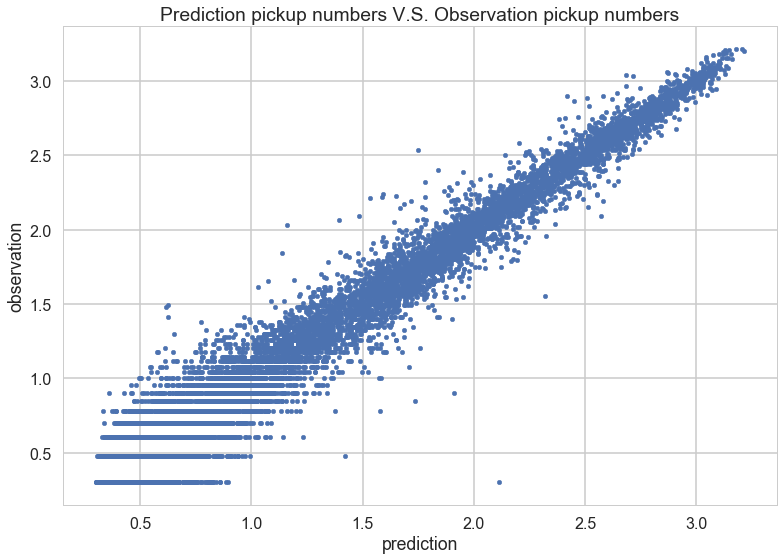

In [22]:
preds.plot(x = "prediction", y = "observation",kind = "scatter", title = "Prediction pickup numbers V.S. Observation pickup numbers")